<a href="https://colab.research.google.com/github/szakmarynandor/FAKT-MLCourse/blob/main/ML_hazi07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7. házi feladat

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

###Adatbázis betöltése

In [3]:
(train_data, _), (test_data, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
train_data.shape

(60000, 28, 28)

In [5]:
test_data.shape

(10000, 28, 28)

In [6]:
train_data = train_data.astype("float32") / 255
train_data = np.reshape(train_data, (len(train_data), 28, 28, 1))
test_data = test_data.astype("float32") / 255
test_data = np.reshape(test_data, (len(test_data), 28, 28, 1))

###Zaj generálása

In [7]:
def noise(array):
    """
    Random zaj a kepekhez
    """
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=array.shape)

    return np.clip(noisy_array, 0.0, 1.0)

In [8]:
noisy_train = noise(train_data)
noisy_test = noise(test_data)

In [9]:
noisy_test.shape

(10000, 28, 28, 1)

In [10]:
def display(array1, array2):
    """
    10 random kep megjelenitese
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

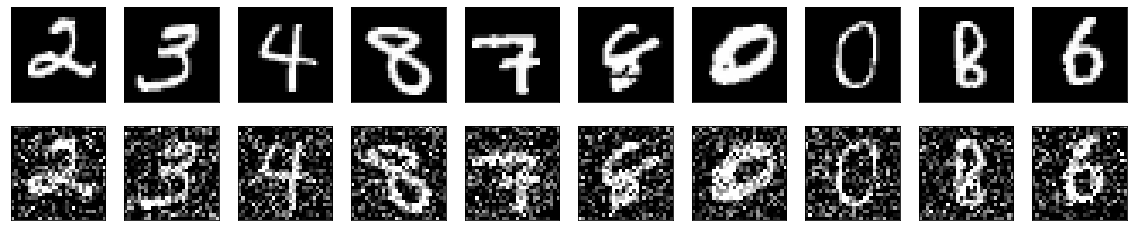

In [11]:
display(train_data, noisy_train)

In [12]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [17]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data)
)

Epoch 1/50
469/469 [==============================] - 8s 16ms/step - loss: 0.0619 - val_loss: 0.0616
Epoch 2/50
469/469 [==============================] - 8s 16ms/step - loss: 0.0619 - val_loss: 0.0618
Epoch 3/50
469/469 [==============================] - 8s 16ms/step - loss: 0.0619 - val_loss: 0.0616
Epoch 4/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0619 - val_loss: 0.0616
Epoch 5/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0619 - val_loss: 0.0616
Epoch 6/50
469/469 [==============================] - 8s 16ms/step - loss: 0.0619 - val_loss: 0.0616
Epoch 7/50
469/469 [==============================] - 8s 16ms/step - loss: 0.0619 - val_loss: 0.0615
Epoch 8/50
469/469 [==============================] - 8s 16ms/step - loss: 0.0619 - val_loss: 0.0616
Epoch 9/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0618 - val_loss: 0.0615
Epoch 10/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0618 - val_lo

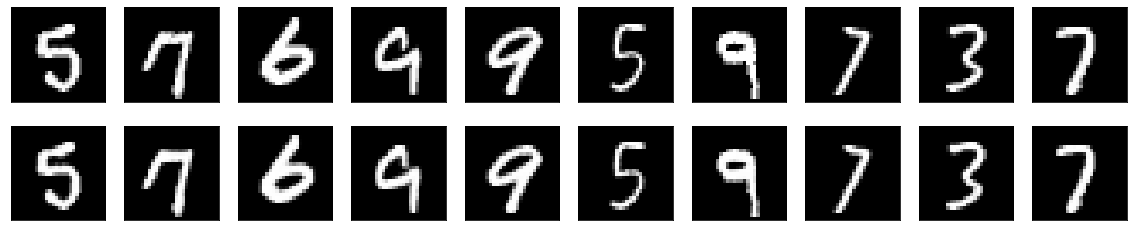

In [18]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(patience=10, restore_best_weights=True)

In [22]:
autoencoder.fit(
    x=noisy_train,
    y=train_data, epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test, test_data),
    callbacks = [early_stopping_callback]
    )

Epoch 1/50
469/469 [==============================] - 8s 17ms/step - loss: 0.1016 - val_loss: 0.0944
Epoch 2/50
469/469 [==============================] - 8s 16ms/step - loss: 0.0937 - val_loss: 0.0921
Epoch 3/50
469/469 [==============================] - 8s 16ms/step - loss: 0.0921 - val_loss: 0.0909
Epoch 4/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0911 - val_loss: 0.0901
Epoch 5/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0903 - val_loss: 0.0894
Epoch 6/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0897 - val_loss: 0.0888
Epoch 7/50
469/469 [==============================] - 8s 16ms/step - loss: 0.0893 - val_loss: 0.0885
Epoch 8/50
469/469 [==============================] - 8s 16ms/step - loss: 0.0888 - val_loss: 0.0881
Epoch 9/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0885 - val_loss: 0.0878
Epoch 10/50
469/469 [==============================] - 8s 17ms/step - loss: 0.0882 - val_lo

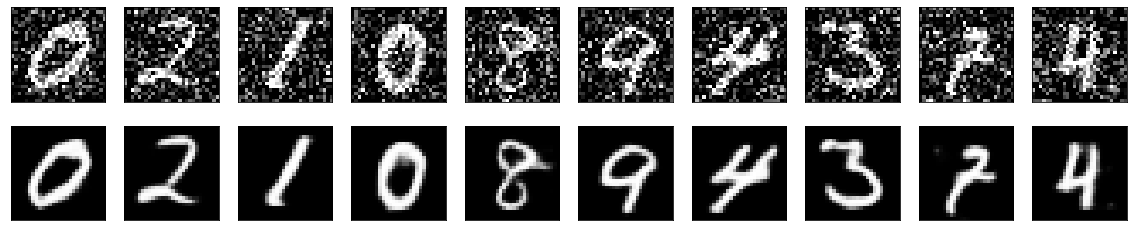

In [23]:
predictions = autoencoder.predict(noisy_test)
display(noisy_test, predictions)